In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('E:\EECS\Corona project\COVID_final\patient_data.csv')
data = data[['id', 'location', 'country', 'gender', 'age', 'international_traveler', 'domestic_traveler','traveler',
              'visiting Wuhan', 'from Wuhan', 'death', 'recovered']]
sns.set()

In [29]:
gender = data[['gender', 'death', 'recovered']].copy()
gender.loc[(gender.death.str.len() > 1.0), 'death'] = 1
gender.loc[(gender.recovered.str.len() > 1.0), 'recovered'] = 1
gender = gender.dropna(subset=['gender'])
gender = gender.fillna(0)
total = len(gender)
male = len(gender[gender['gender'] == 'male'])
female = len(gender[gender['gender'] == 'female'])
gender[['death', 'recovered']] = gender[['death', 'recovered']].astype(int)
gender[['death', 'recovered']] = gender[['death', 'recovered']].astype(bool)

In [5]:
filtered = gender.groupby('gender').sum()
filtered['positive'] = [male, female]
filtered = filtered / total * 100
filtered = filtered.reset_index()
filtered

,gender,death,recovered,positive
0,female,1.639344,5.245902,56.0
1,male,3.278689,6.360656,44.0


In [6]:
reshaped = pd.DataFrame(data={})
reshaped['gender'] = ['male', 'male', 'male', 'female', 'female', 'female']
temp = filtered.loc[1, ['positive', 'death', 'recovered']].tolist()
temp.extend(filtered.loc[0, ['positive', 'death', 'recovered']].tolist())
reshaped['percentage'] = temp
reshaped['status'] = ['positive', 'death', 'recovered', 'positive', 'death', 'recovered']
reshaped.dtypes

gender         object
percentage    float64
status         object
dtype: object

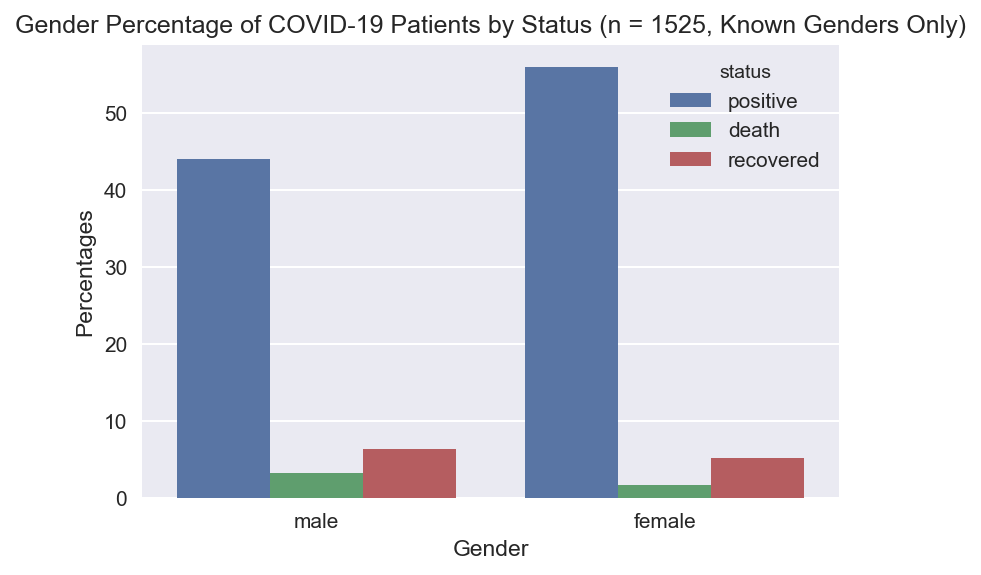

In [27]:
plt.figure(dpi=150)
gender_plot = sns.barplot(x='gender', y='percentage', data=reshaped, hue='status')
plt.title('Gender Percentage of COVID-19 Patients by Status (n = 1525, Known Genders Only)')
plt.ylabel('Percentages')
plt.xlabel('Gender')
gender_plot